# Capstone Two - Data Cleaning

In [1]:
#import the necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
rawdata = pd.read_csv('kc_final.csv')

In [4]:
rawdata.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
rawdata.shape

(21613, 22)

In [6]:
rawdata.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# first thing I noticed is the extra 'Unamed' column that we need to drop

In [8]:
rawdata = rawdata.drop('Unnamed: 0', axis=1)

In [9]:
rawdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# next I want to start looking for any null data that might exist in the dataset

In [11]:
rawdata.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
rawdata.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
#Great! no null or missing values that we can clearly see yet

In [14]:
#it is weird that there is a lot of zeros in the yr_renovated column, but this could be the signal for
#no renovations having occured, curious what the ratio is to renovated and not renovated

In [15]:
sum(rawdata['yr_renovated']==0)

20699

In [16]:
sum(rawdata['yr_renovated']!=0)

914

In [17]:
#it appears this is the same method for sqft_basement, view, and waterfront where 0 equates to no basement, no view
#and no waterfrontage 

In [18]:
#since we don't have a ton of columns, we could go through each one and look for unique values, max/min to see if
#anything seems 'off' within each column that would lead us to think there was a mistype or mistake we need to omit

In [19]:
print(sorted(rawdata['date'].unique()))

['2014-05-02', '2014-05-03', '2014-05-04', '2014-05-05', '2014-05-06', '2014-05-07', '2014-05-08', '2014-05-09', '2014-05-10', '2014-05-11', '2014-05-12', '2014-05-13', '2014-05-14', '2014-05-15', '2014-05-16', '2014-05-17', '2014-05-18', '2014-05-19', '2014-05-20', '2014-05-21', '2014-05-22', '2014-05-23', '2014-05-24', '2014-05-25', '2014-05-26', '2014-05-27', '2014-05-28', '2014-05-29', '2014-05-30', '2014-05-31', '2014-06-01', '2014-06-02', '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-07', '2014-06-08', '2014-06-09', '2014-06-10', '2014-06-11', '2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15', '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19', '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05', '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10', '2014-07-11', '2014

In [20]:
#nothing seems off here

In [21]:
print(sorted(rawdata['price'].unique()))

[75000.0, 78000.0, 80000.0, 81000.0, 82000.0, 82500.0, 83000.0, 84000.0, 85000.0, 86500.0, 89000.0, 89950.0, 90000.0, 92000.0, 95000.0, 96500.0, 99000.0, 100000.0, 102500.0, 104950.0, 105000.0, 105500.0, 106000.0, 107000.0, 109000.0, 109500.0, 110000.0, 110700.0, 111300.0, 112000.0, 114000.0, 114975.0, 115000.0, 118000.0, 118125.0, 119500.0, 119900.0, 120000.0, 120750.0, 121800.0, 122000.0, 123000.0, 123300.0, 124000.0, 124500.0, 124740.0, 125000.0, 126000.0, 126500.0, 128000.0, 128750.0, 129000.0, 129888.0, 130000.0, 132500.0, 132825.0, 133000.0, 133400.0, 134000.0, 135000.0, 135900.0, 136500.0, 137000.0, 137124.0, 137900.0, 139000.0, 139500.0, 139950.0, 140000.0, 141800.0, 142000.0, 142500.0, 143000.0, 144000.0, 144975.0, 145000.0, 145600.0, 146000.0, 146300.0, 147000.0, 147200.0, 147400.0, 147500.0, 148000.0, 148226.0, 148900.0, 149000.0, 149500.0, 149900.0, 150000.0, 150550.0, 151000.0, 151100.0, 151600.0, 152000.0, 152275.0, 152500.0, 152900.0, 153000.0, 153500.0, 153503.0, 154000

In [22]:
#looks like the most expensie home is $7 mil and the least expensive is $75,000

In [23]:
print(sorted(rawdata['bedrooms'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]


In [24]:
#33 bedrooms, is that right? 

In [25]:
rawdata.loc[rawdata['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [26]:
#based on the sq footage, I don't think this is correct especially with 1.75 bathrooms and 1620 sq ft
#I think they meant '3' bedrooms, but since we can't confirm, we should drop the row, we still have plenty of data 

In [27]:
rawdata = rawdata.drop(labels=None, axis=0, index=15870)

In [28]:
print(sorted(rawdata['bedrooms'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [29]:
rawdata.loc[rawdata['bedrooms']==11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.0,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


In [30]:
# 11 bedrooms in a 3000 sq ft house also seems unrealistic

In [31]:
rawdata = rawdata.drop(labels=None, axis=0, index=8757)

In [32]:
rawdata.loc[rawdata['bedrooms']==10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [33]:
#13314 seems real based on the sq footage, but the other two i'm doubtful based on the sales price and sq footage
#we have plenty of data, so maybe it's best we drop these other two 

In [34]:
rawdata = rawdata.drop(labels=None, axis=0, index=15161)

In [35]:
rawdata = rawdata.drop(labels=None, axis=0, index=19254)

In [36]:
rawdata.loc[rawdata['bedrooms']==9]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4096,1997200215,2014-05-07,599999.0,9,4.5,3830,6988,2.5,0,0,...,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
4235,2902200015,2015-01-06,700000.0,9,3.0,3680,4400,2.0,0,0,...,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
6079,9822700190,2014-08-08,1280000.0,9,4.5,3650,5000,2.0,0,0,...,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
8546,424049043,2014-08-11,450000.0,9,7.5,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
16844,8823900290,2015-03-17,1400000.0,9,4.0,4620,5508,2.5,0,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
18443,8823901445,2015-03-13,934000.0,9,3.0,2820,4480,2.0,0,0,...,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400


In [37]:
rawdata = rawdata.drop(labels=None, axis=0, index=18443)

In [38]:
rawdata.loc[rawdata['bedrooms']==8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1660,9126101740,2014-12-04,490000.0,8,5.00,2800,2580,2.0,0,0,...,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
4035,685000115,2014-10-07,2150000.0,8,6.00,4340,9415,2.0,0,0,...,8,4340,0,1967,0,98004,47.6316,-122.202,2050,9100
4067,7226500100,2015-02-19,373000.0,8,3.00,2850,12714,1.0,0,0,...,7,2850,0,1959,0,98055,47.4859,-122.205,1480,4942
6174,1873400020,2014-07-03,340000.0,8,2.75,2790,6695,1.0,0,0,...,7,1470,1320,1977,0,98133,47.7565,-122.331,1760,7624
9077,6746700615,2015-03-18,700000.0,8,2.50,2280,3000,1.5,0,0,...,7,1210,1070,1911,0,98105,47.6675,-122.316,1610,3000
9452,2769600590,2014-10-16,900000.0,8,4.00,4020,7500,1.0,0,0,...,8,2010,2010,1968,0,98107,47.6732,-122.363,1560,3737
10958,1652500060,2014-07-11,1650000.0,8,2.75,4040,20666,1.0,0,0,...,9,2020,2020,1962,0,98004,47.6340,-122.221,3670,20500
12885,8813400155,2014-12-19,808000.0,8,3.75,3460,4600,2.0,0,0,...,7,2860,600,1987,0,98105,47.6617,-122.289,2170,3750
15070,7418000130,2014-12-11,430000.0,8,3.25,4300,10441,2.0,0,0,...,8,2800,1500,1979,0,98059,47.4786,-122.131,1780,10457
15670,8141200080,2014-08-14,680000.0,8,2.75,2530,4800,2.0,0,0,...,7,1390,1140,1901,0,98112,47.6241,-122.305,1540,4800


In [39]:
rawdata = rawdata.drop(labels=None, axis=0, index=1660)
rawdata = rawdata.drop(labels=None, axis=0, index=4067)
rawdata = rawdata.drop(labels=None, axis=0, index=6174)
rawdata = rawdata.drop(labels=None, axis=0, index=9077)
rawdata = rawdata.drop(labels=None, axis=0, index=15670)

In [40]:
#I think we did away with all the obvious outliers at this point, let's move on

In [41]:
print(sorted(rawdata['bathrooms'].unique()))

[0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]


In [42]:
rawdata.loc[rawdata['bathrooms']==8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
12777,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [43]:
#seems fine to me

In [44]:
print(sorted(rawdata['sqft_living'].unique()))

[290, 370, 380, 384, 390, 410, 420, 430, 440, 460, 470, 480, 490, 500, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 809, 810, 820, 828, 830, 833, 840, 844, 850, 860, 870, 880, 890, 893, 894, 900, 901, 902, 910, 920, 930, 940, 950, 960, 962, 970, 980, 982, 988, 990, 998, 1000, 1008, 1010, 1020, 1030, 1040, 1048, 1050, 1060, 1061, 1068, 1070, 1072, 1076, 1078, 1080, 1084, 1088, 1090, 1092, 1095, 1100, 1108, 1110, 1120, 1122, 1129, 1130, 1131, 1140, 1150, 1159, 1160, 1170, 1175, 1180, 1190, 1200, 1210, 1212, 1220, 1230, 1232, 1233, 1239, 1240, 1250, 1252, 1255, 1256, 1260, 1264, 1270, 1275, 1278, 1280, 1290, 1295, 1296, 1300, 1310, 1313, 1315, 1320, 1322, 1330, 1333, 1340, 1347, 1350, 1352, 1358, 1360, 1365, 1370, 1380, 1381, 1384, 1390, 1392, 1396, 1397, 1400, 1405, 1408, 1410, 1413, 1414, 1420, 1422, 1425, 1427, 1430, 1435, 1440, 1444, 1445, 1450, 1451, 1453, 1458, 1460, 1463, 1465, 1470,

In [45]:
rawdata.loc[rawdata['sqft_living']==290]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [46]:
rawdata = rawdata.drop(labels=None, axis=0, index=19452)

In [47]:
rawdata.loc[rawdata['sqft_living']==370]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15381,2856101479,2014-07-01,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000


In [48]:
rawdata.loc[rawdata['sqft_living']==380]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
860,1723049033,2014-06-20,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.481,-122.323,1170,15000


In [49]:
#ok these all seem real

In [50]:
print(sorted(rawdata['sqft_lot'].unique()))

[520, 572, 600, 609, 635, 638, 649, 651, 675, 676, 681, 683, 690, 696, 698, 700, 704, 705, 711, 713, 720, 725, 736, 740, 745, 746, 747, 750, 758, 761, 762, 772, 779, 780, 785, 798, 800, 801, 804, 806, 809, 811, 812, 813, 814, 816, 819, 825, 826, 833, 834, 835, 844, 846, 847, 850, 851, 853, 857, 858, 863, 864, 865, 867, 868, 871, 873, 874, 875, 877, 881, 885, 886, 887, 889, 890, 892, 895, 900, 902, 904, 905, 907, 912, 913, 914, 915, 916, 920, 922, 923, 925, 926, 929, 930, 932, 934, 936, 937, 940, 941, 942, 944, 946, 948, 949, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 962, 963, 965, 966, 968, 969, 972, 974, 975, 976, 977, 979, 980, 981, 982, 983, 986, 987, 989, 990, 991, 997, 998, 999, 1000, 1001, 1002, 1005, 1007, 1010, 1011, 1012, 1013, 1014, 1016, 1017, 1020, 1021, 1022, 1023, 1024, 1026, 1027, 1028, 1029, 1031, 1032, 1033, 1034, 1036, 1037, 1039, 1040, 1041, 1042, 1044, 1046, 1049, 1050, 1051, 1053, 1055, 1056, 1057, 1058, 1060, 1062, 1064, 1066, 1067, 1068, 1069, 1071, 1072,

In [51]:
#at first some of the lot sizes to house sizes seemed strange, but then some may have multiple levels and basements
#that account for this, I'm thinking we leave these alone

In [52]:
print(sorted(rawdata['floors'].unique()))

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]


In [53]:
print(sorted(rawdata['waterfront'].unique()))

[0, 1]


In [54]:
print(sorted(rawdata['view'].unique()))

[0, 1, 2, 3, 4]


In [55]:
print(sorted(rawdata['condition'].unique()))

[1, 2, 3, 4, 5]


In [56]:
print(sorted(rawdata['grade'].unique()))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [57]:
print(sorted(rawdata['sqft_above'].unique()))

[370, 380, 384, 390, 410, 420, 430, 440, 460, 470, 480, 490, 500, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 765, 770, 780, 790, 798, 800, 806, 809, 810, 820, 828, 830, 833, 840, 844, 850, 860, 866, 870, 880, 890, 893, 894, 900, 901, 902, 910, 920, 930, 940, 944, 950, 960, 962, 963, 970, 980, 988, 990, 992, 995, 998, 1000, 1002, 1008, 1010, 1020, 1030, 1040, 1048, 1050, 1060, 1061, 1068, 1070, 1072, 1076, 1078, 1080, 1084, 1087, 1088, 1090, 1092, 1094, 1095, 1100, 1105, 1108, 1110, 1116, 1120, 1122, 1129, 1130, 1131, 1140, 1144, 1150, 1159, 1160, 1165, 1170, 1175, 1180, 1190, 1200, 1210, 1212, 1216, 1220, 1230, 1232, 1239, 1240, 1248, 1250, 1255, 1256, 1260, 1264, 1270, 1275, 1280, 1288, 1290, 1295, 1296, 1300, 1310, 1313, 1315, 1320, 1322, 1329, 1330, 1333, 1340, 1341, 1347, 1350, 1352, 1355, 1358, 1360, 1363, 1370, 1380, 1381, 1384, 1390, 1392, 1396, 1397, 1400, 1405, 1408, 1410, 1413, 1414, 1419, 1420,

In [58]:
print(sorted(rawdata['sqft_basement'].unique()))

[0, 10, 20, 40, 50, 60, 65, 70, 80, 90, 100, 110, 120, 130, 140, 143, 145, 150, 160, 170, 172, 176, 180, 190, 200, 207, 210, 220, 225, 230, 235, 240, 243, 248, 250, 260, 265, 266, 270, 274, 276, 280, 283, 290, 295, 300, 310, 320, 330, 340, 350, 360, 370, 374, 380, 390, 400, 410, 414, 415, 417, 420, 430, 435, 440, 450, 460, 470, 475, 480, 490, 500, 506, 508, 510, 515, 516, 518, 520, 530, 540, 550, 556, 560, 570, 580, 588, 590, 600, 602, 610, 620, 630, 640, 650, 652, 660, 666, 670, 680, 690, 700, 704, 710, 720, 730, 740, 750, 760, 768, 770, 780, 784, 790, 792, 800, 810, 820, 830, 840, 850, 860, 861, 862, 870, 875, 880, 890, 894, 900, 906, 910, 915, 920, 930, 935, 940, 946, 950, 960, 970, 980, 990, 1000, 1008, 1010, 1020, 1024, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1135, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1245, 1248, 1250, 1260, 1270, 1275, 1280, 1281, 1284, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1

In [59]:
rawdata.loc[rawdata['sqft_basement']==10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20612,2724049222,2014-08-02,163800.0,2,2.5,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20613,2724049222,2014-12-01,220000.0,2,2.5,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466


In [60]:
#says two floors, maybe it's just a storage area underground

In [61]:
print(sorted(rawdata['yr_built'].unique()))

[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [62]:
print(sorted(rawdata['yr_renovated'].unique()))

[0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [63]:
print(sorted(rawdata['sqft_living15'].unique()))

[399, 460, 620, 670, 690, 700, 710, 720, 740, 750, 760, 770, 780, 790, 800, 806, 810, 820, 828, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 952, 960, 970, 980, 990, 998, 1000, 1010, 1020, 1030, 1040, 1050, 1056, 1060, 1070, 1076, 1078, 1080, 1084, 1088, 1090, 1092, 1098, 1100, 1110, 1120, 1125, 1128, 1130, 1131, 1132, 1137, 1138, 1140, 1150, 1156, 1160, 1162, 1168, 1170, 1175, 1180, 1188, 1190, 1200, 1210, 1216, 1217, 1220, 1228, 1230, 1232, 1240, 1250, 1256, 1260, 1264, 1268, 1270, 1277, 1280, 1282, 1285, 1290, 1295, 1300, 1302, 1303, 1304, 1307, 1309, 1310, 1320, 1321, 1326, 1330, 1336, 1340, 1346, 1350, 1352, 1356, 1357, 1358, 1360, 1364, 1365, 1369, 1370, 1377, 1380, 1381, 1390, 1398, 1399, 1400, 1404, 1405, 1408, 1410, 1414, 1415, 1420, 1425, 1427, 1429, 1430, 1439, 1440, 1442, 1443, 1445, 1448, 1450, 1458, 1459, 1460, 1463, 1466, 1468, 1470, 1480, 1481, 1484, 1490, 1492, 1494, 1495, 1500, 1502, 1509, 1510, 1516, 1518, 1520, 1522, 1525, 1528, 1530, 1536, 1537,

In [64]:
print(sorted(rawdata['sqft_lot15'].unique()))

[651, 659, 660, 748, 750, 755, 757, 758, 788, 794, 809, 810, 817, 824, 886, 887, 899, 914, 915, 925, 928, 942, 953, 955, 958, 964, 967, 972, 976, 977, 980, 982, 994, 1003, 1007, 1008, 1016, 1017, 1021, 1023, 1026, 1027, 1030, 1034, 1038, 1050, 1056, 1057, 1058, 1059, 1060, 1062, 1064, 1066, 1068, 1079, 1080, 1081, 1082, 1083, 1086, 1087, 1089, 1090, 1092, 1094, 1095, 1099, 1104, 1106, 1107, 1110, 1111, 1112, 1113, 1116, 1118, 1121, 1124, 1125, 1126, 1135, 1136, 1137, 1138, 1140, 1143, 1146, 1149, 1150, 1151, 1152, 1156, 1158, 1159, 1160, 1161, 1163, 1167, 1169, 1170, 1171, 1172, 1173, 1174, 1177, 1180, 1182, 1183, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1193, 1194, 1196, 1198, 1199, 1200, 1201, 1202, 1203, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1213, 1215, 1217, 1223, 1224, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1236, 1237, 1240, 1242, 1243, 1245, 1246, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1260, 1263, 1264, 1265, 1266, 1267, 1269, 1270, 1273, 

In [65]:
rawdata.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [66]:
rawdata.shape

(21602, 21)

In [67]:
cleaneddata = rawdata

# Capstone Two - EDA

In [71]:
#Summary stats
numerical_vars=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement','lat', 'long', 'sqft_living15', 'sqft_lot15']
cleaneddata[numerical_vars].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,21602.000000,21602.000000,21602.000000,2.160200e+04,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000
mean,3.367327,2.114503,2079.685353,1.511088e+04,1.494260,1788.408851,291.276502,47.560022,-122.213874,1986.690538,12771.461763
std,0.900603,0.769847,918.429880,4.143052e+04,0.540019,828.122504,442.466244,0.138582,0.140831,685.504041,27310.511722
min,0.000000,0.000000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1422.750000,5.040000e+03,1.000000,1190.000000,0.000000,47.470800,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1560.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.750000
max,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


/var/folders/2r/1ydm5z_940ngn4rb5wwtjkq40000gn/T/ipykernel_53279/817745334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaneddata.corr())


<Axes: >

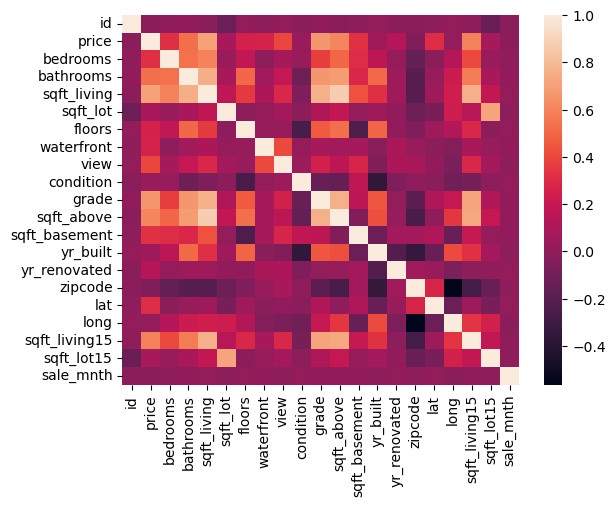

In [86]:
sns.heatmap(cleaneddata.corr())

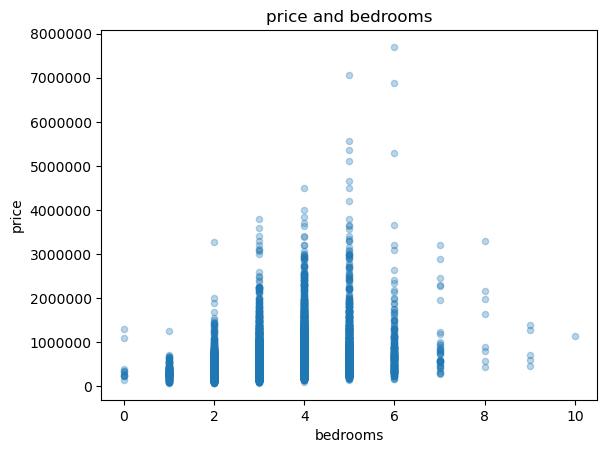

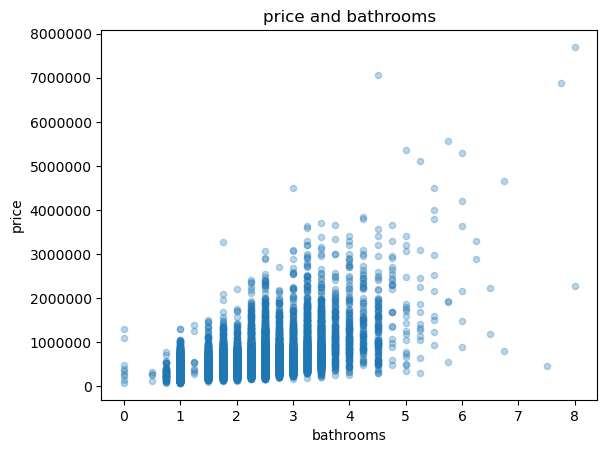

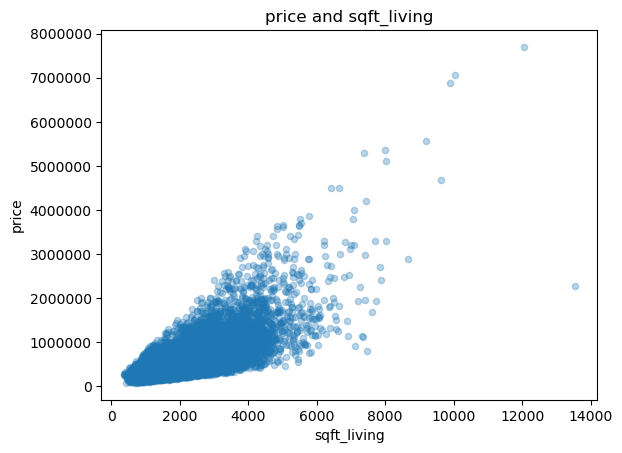

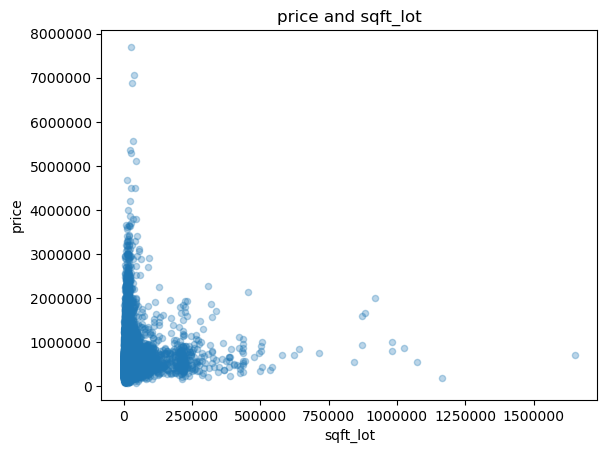

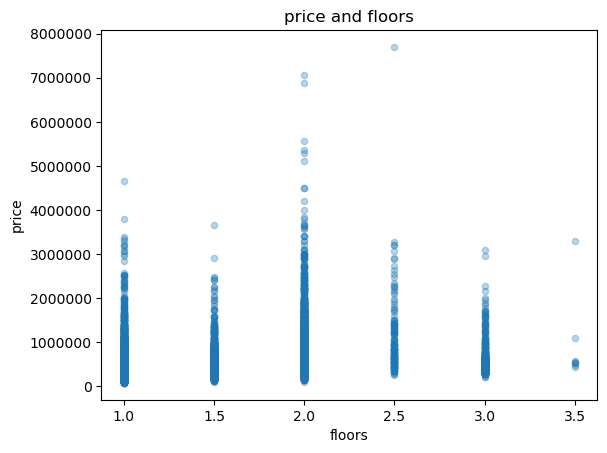

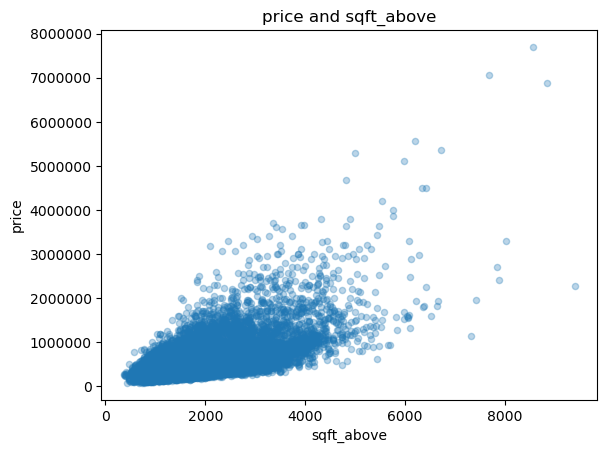

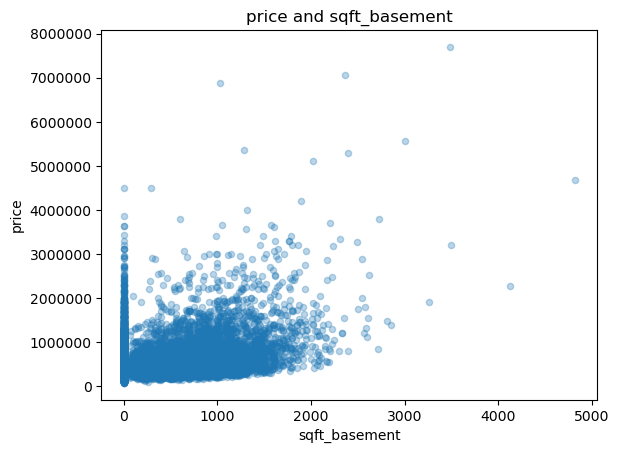

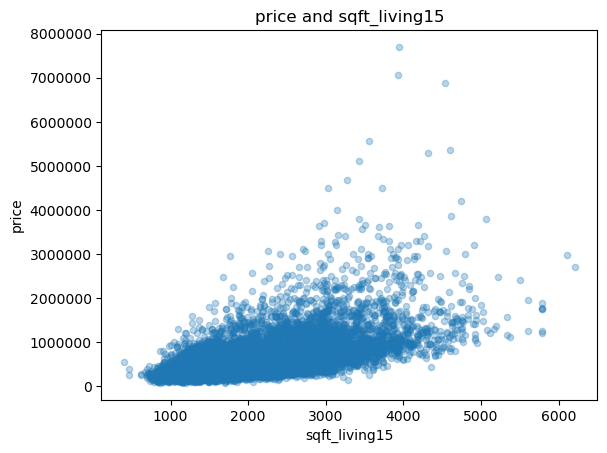

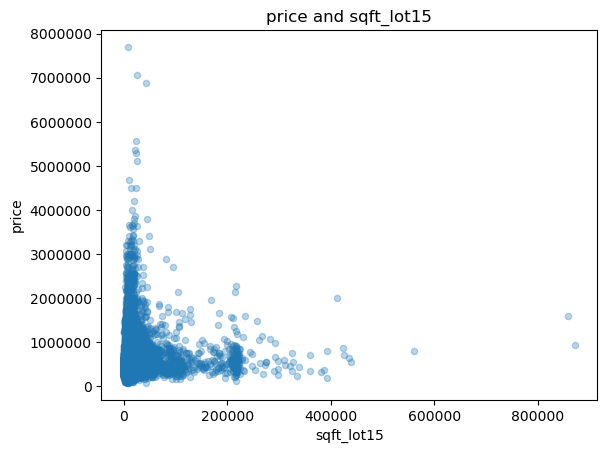

In [73]:
num_features=['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                                                  'sqft_living15', 'sqft_lot15']
for feature in num_features:
    cleaneddata.plot(kind='scatter', x=feature, y='price', alpha=0.3)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
#     title="price and "+ feature
    plt.title("price and {}".format(feature))

In [74]:
categorical_vars=['date','waterfront', 'view', 'condition', 'grade','yr_built', 'yr_renovated', 'zipcode']
temp_df=cleaneddata[categorical_vars].astype('object')
temp_df[categorical_vars].describe()

,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
count,21602,21602,21602,21602,21602,21602,21602,21602
unique,372,2,5,5,11,116,70,70
top,2014-06-23,0,0,3,7,2014,0,98103
freq,142,21439,19478,14025,8972,559,20689,601


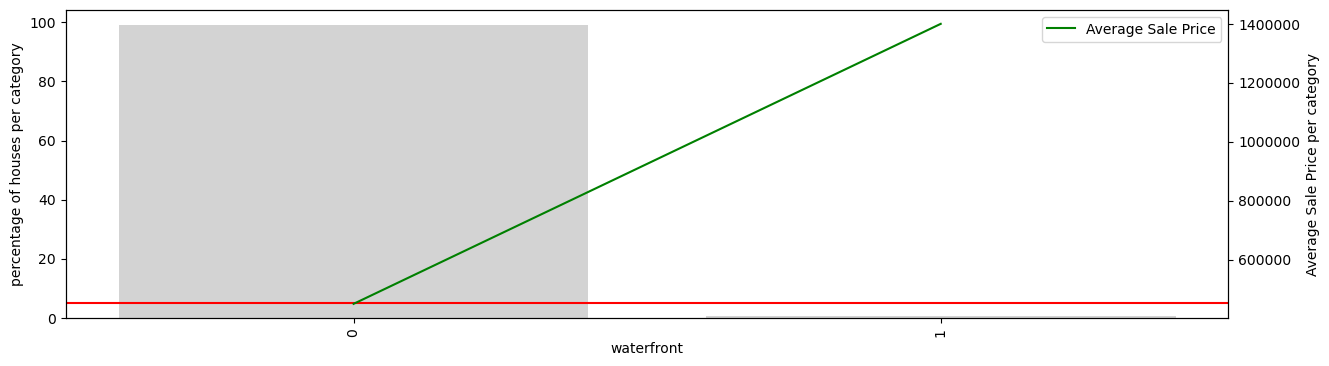

In [77]:
temp_df = calculate_mean_target_per_category(cleaneddata, 'waterfront')
plot_categories(temp_df,'waterfront')

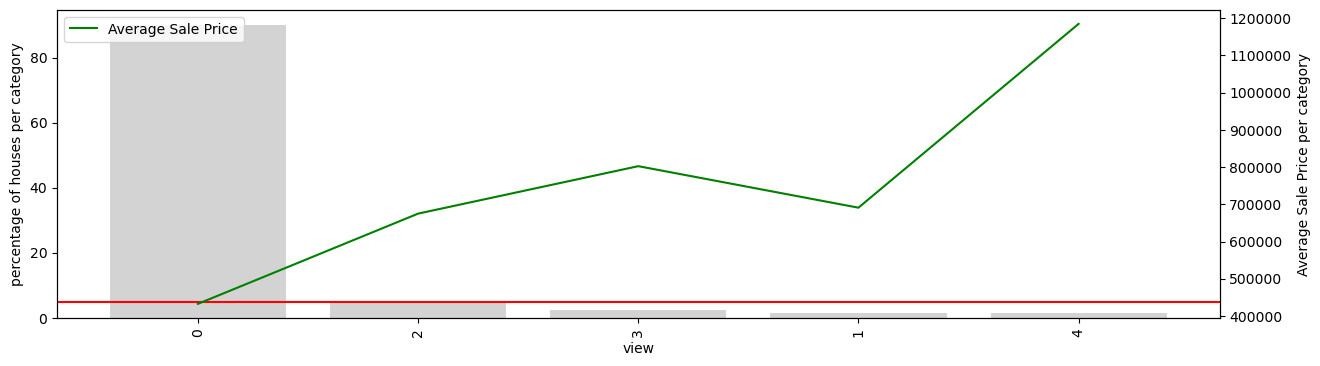

In [79]:
temp_df = calculate_mean_target_per_category(cleaneddata, 'view')
plot_categories(temp_df,'view')

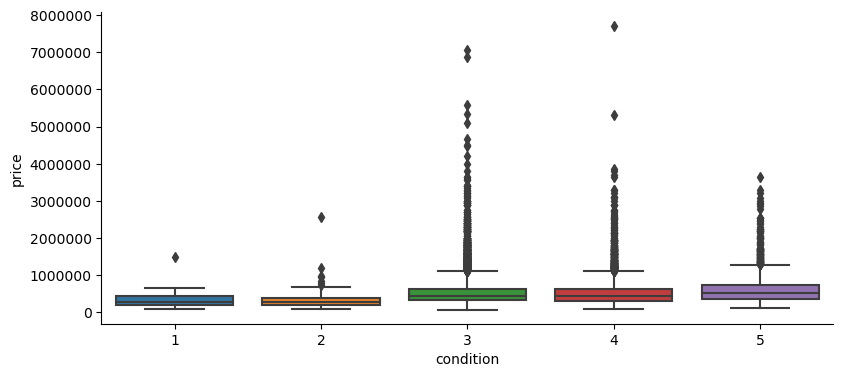

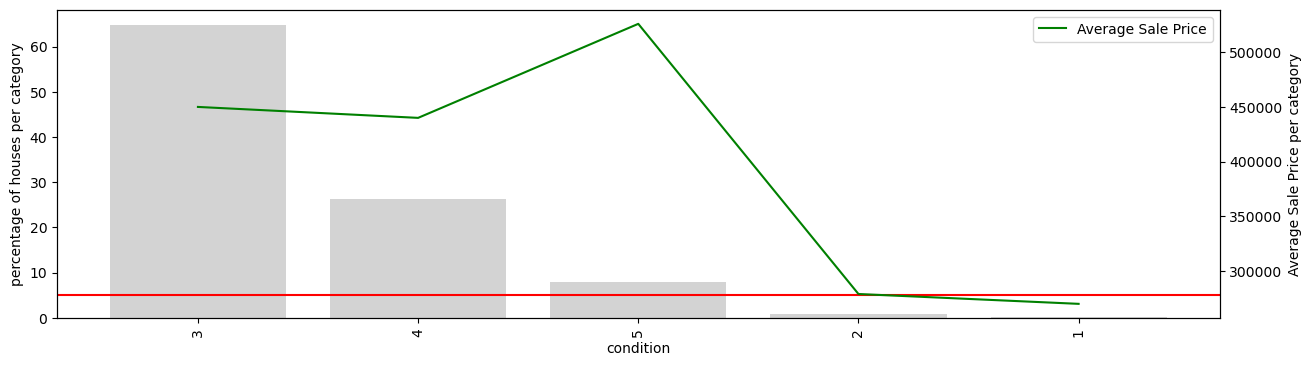

In [80]:
sns.catplot(x='condition', y='price', data=cleaneddata, kind="box", height=4, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
temp_df = calculate_mean_target_per_category(cleaneddata, 'condition')
plot_categories(temp_df,'condition')

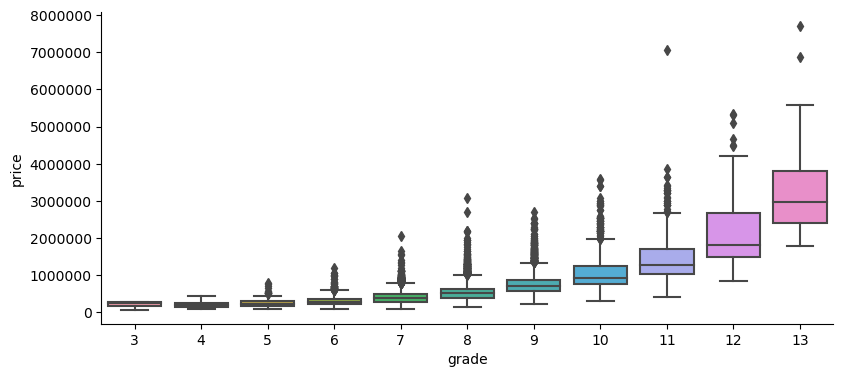

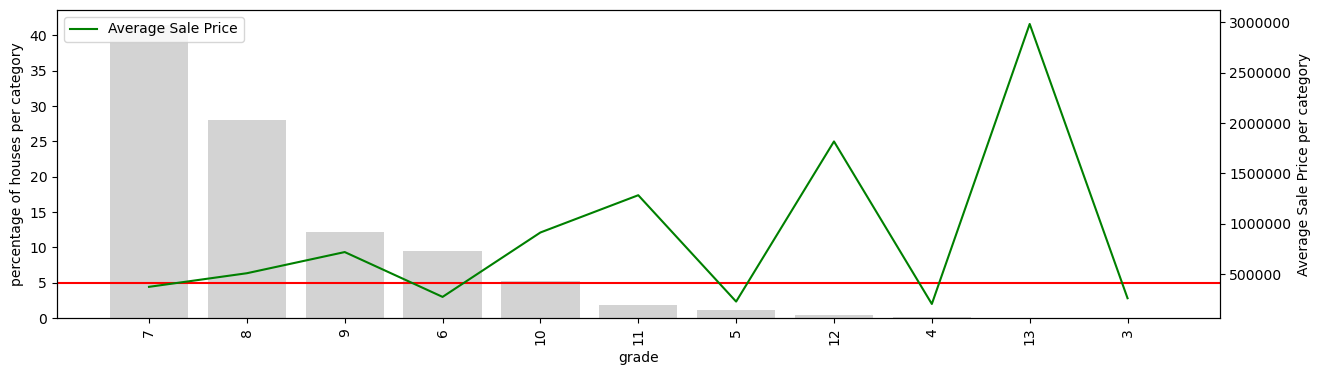

In [81]:
sns.catplot(x='grade', y='price', data=cleaneddata, kind="box", height=4, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
temp_df = calculate_mean_target_per_category(cleaneddata, 'grade')
plot_categories(temp_df,'grade')

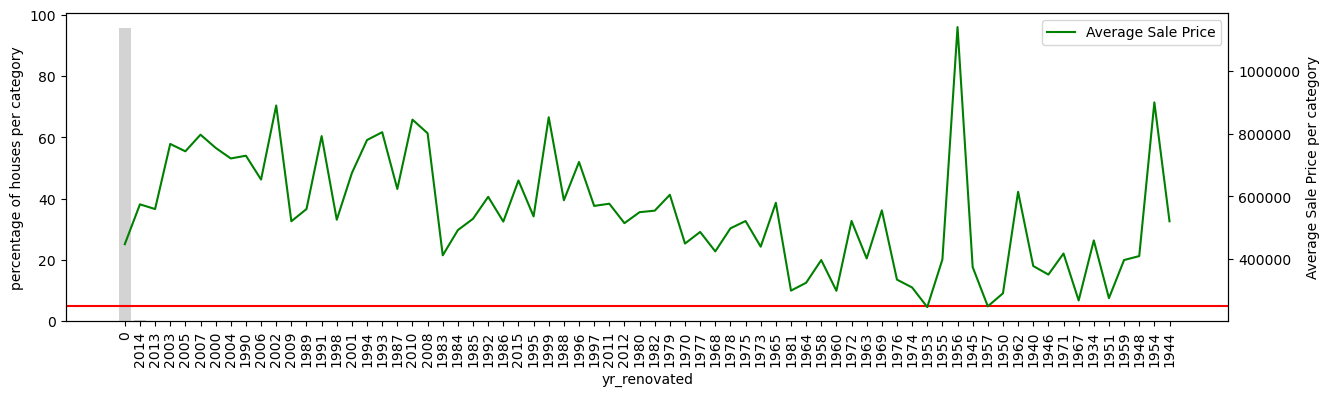

In [82]:
temp_df = calculate_mean_target_per_category(cleaneddata, 'yr_renovated')
plot_categories(temp_df,'yr_renovated')

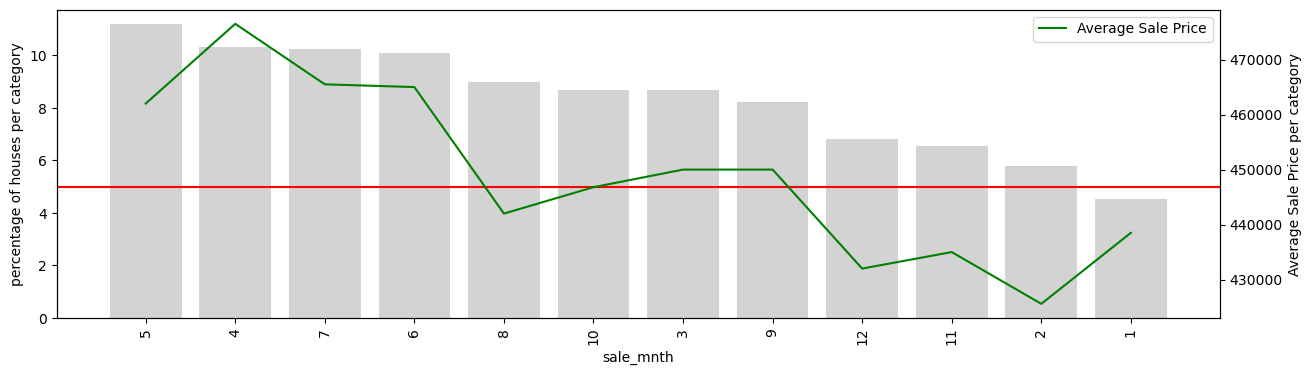

In [83]:
cleaneddata['date']=pd.to_datetime(cleaneddata['date'])
cleaneddata['sale_mnth']=cleaneddata['date'].dt.month
temp_df = calculate_mean_target_per_category(cleaneddata, 'sale_mnth')
plot_categories(temp_df,'sale_mnth')